# Regression problem

## Import All Libaray

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [11]:
# # Set Display of Monitor
pd.set_option('Display.max_rows',500)
pd.set_option('Display.max_columns',500)
pd.set_option('Display.width',1000)

# Data Read and Explore and Understand

In [4]:
os.getcwd()

'C:\\Users\\DELL'

In [21]:
os.chdir('C:/Users/DELL/OneDrive/Desktop/Download')

In [22]:
data = pd.read_csv('housing data.csv')

In [23]:
final = data.copy()

In [24]:
final.head(3)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500


In [25]:
final.tail(3)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,1417,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,NaN,142125
1417,1418,5,1965,1256,SBrkr,1256,1,Attchd,1,276,NaN,NaN,147500


In [26]:
print('Total Rows of Dataset:-',final.shape[0])
print('Total Columns of Dataset:-',final.shape[1])

Total Rows of Dataset:- 1418
Total Columns of Dataset:- 13


In [27]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


In [28]:
final.columns

Index(['Id', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical',
       'GrLivArea', 'FullBath', 'GarageType', 'GarageCars', 'GarageArea',
       'Fence', 'MiscFeature', 'SalePrice'],
      dtype='object')

In [29]:
final.index

RangeIndex(start=0, stop=1418, step=1)

In [30]:
final.columns[final.dtypes == object]

Index(['Electrical', 'GarageType', 'Fence', 'MiscFeature'], dtype='object')

In [31]:
final.columns[final.dtypes != object]

Index(['Id', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [32]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


## Univariate Analysis--> Explore one column at a one time

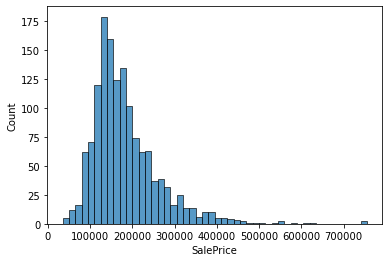

In [33]:
sns.histplot(final['SalePrice'])
plt.show()

Skewness:- 1.8646120239750106
Kortosis:- 6.432852054835754


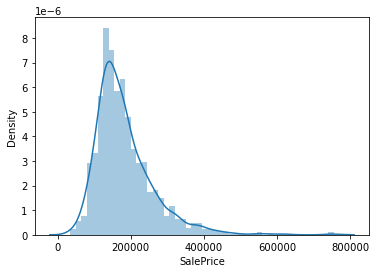

In [34]:
sns.distplot(final['SalePrice'])
print('Skewness:-',final['SalePrice'].skew())
print('Kortosis:-',final['SalePrice'].kurt())
plt.show()

In [39]:
final['SalePrice'].describe()

count      1418.000000
mean     182089.485896
std       79970.934085
min       34900.000000
25%      130000.000000
50%      164800.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Bivariate Analysis --> Continuous Vs Continuous

In [35]:
data.corr().T

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
Id,1.000000,-0.029188,-0.017960,-0.019396,0.002991,-0.000113,0.015633,0.014457,-0.029967
OverallQual,-0.029188,1.000000,0.584692,0.545747,0.592881,0.550112,0.609104,0.567796,0.791478
YearBuilt,-0.017960,0.584692,1.000000,0.396971,0.204757,0.478441,0.550275,0.492807,0.528006
TotalBsmtSF,-0.019396,0.545747,0.396971,1.000000,0.456365,0.326705,0.442614,0.495600,0.619852
GrLivArea,0.002991,0.592881,0.204757,0.456365,1.000000,0.626942,0.472139,0.470736,0.709503
FullBath,-0.000113,0.550112,0.478441,0.326705,0.626942,1.000000,0.473365,0.408453,0.562269
GarageCars,0.015633,0.609104,0.550275,0.442614,0.472139,0.473365,1.000000,0.884674,0.647676
GarageArea,0.014457,0.567796,0.492807,0.495600,0.470736,0.408453,0.884674,1.000000,0.627264
SalePrice,-0.029967,0.791478,0.528006,0.619852,0.709503,0.562269,0.647676,0.627264,1.000000


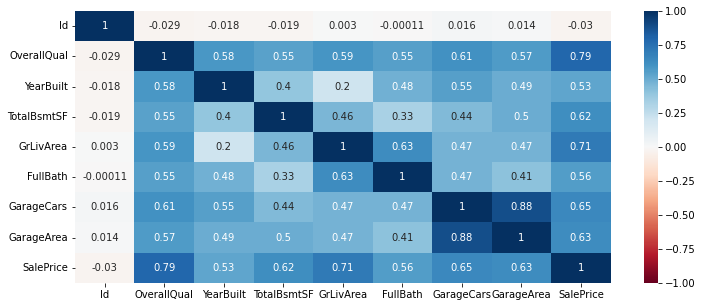

In [38]:
plt.figure(figsize=(12,5))
sns.heatmap(final.corr(),vmax=1,vmin=-1,annot=True,cmap='RdBu')
plt.show()

In [41]:
# Statistical summary of the dataset
final.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


## Bivariate Analysis --> Categorical Vs Continuous

In [42]:
Cat = final.columns[final.dtypes == object]

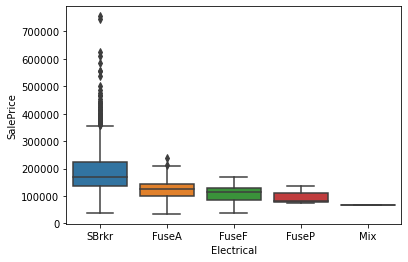

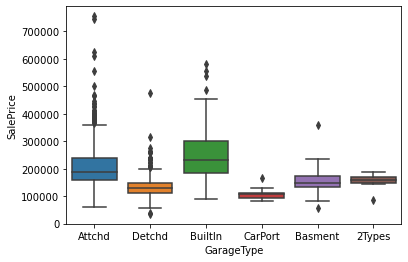

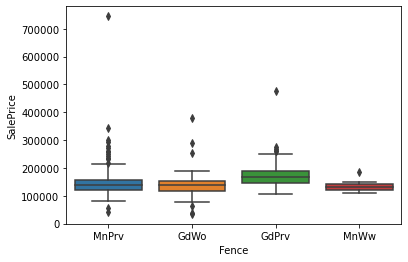

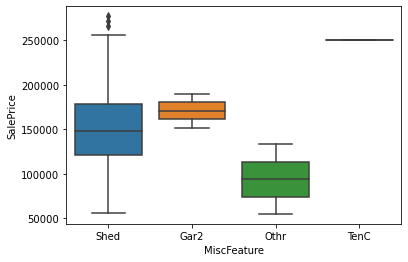

In [45]:
for i in Cat:
    figure()
    sns.boxplot(y=final['SalePrice'],x=final[i])

# Some perfrom statistical test

# Z-test -- Two continuous column

In [47]:
from statsmodels.stats.weightstats import ztest,ttest_ind

In [48]:
price_a = final[final['TotalBsmtSF']<=5]['SalePrice']
price_b = final[final['TotalBsmtSF']>5]['SalePrice']

In [49]:
# Ho -- Null hypothesis --> TotalBsmtSF Does not impact on SalePrice
# H1 --- Alternate hypothesis --> TotalBsmtSF impact on salePrice
z_square,p_value = ztest(price_a,price_b)
print('z_square:-',z_square)
print('P_value:-',p_value)
if p_value<0.05:
    print('Accept the H1')
else:
    print('Accept the Ho')

z_square:- -5.684196016877579
P_value:- 1.3142946674307024e-08
Accept the H1


# Chi_square test two categorical column

In [32]:
final['Electrical'].value_counts()

SBrkr    1300
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [33]:
final['Fence'].value_counts()

MnPrv    148
GdPrv     58
GdWo      53
MnWw      11
Name: Fence, dtype: int64

In [34]:
cate = pd.crosstab(final['Electrical'],final['Fence'])

In [35]:
from scipy.stats import chi2_contingency

In [36]:
# Ho :- Null hypothesis -- > Two columns are Independent
# H1 :- Alternate hypothesis --> Two columns are Dependent
chi,p,dof,excepted = chi2_contingency(cate)
print('chi_square:-',chi)
print('p_value:-',p)
if p<0.05:
    print('Accept the H1')
else:
    print('Accept the Ho')

chi_square:- 3.0272952075654658
p_value:- 0.8054132796910921
Accept the Ho


# Data preprocessing

In [52]:
final.head(2)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500


In [51]:
final['Electrical'].value_counts()

SBrkr    1300
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [53]:
final['GarageType'].value_counts()

Attchd     800
Detchd     354
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

# Imputation missing values

In [37]:
final.isnull().sum().sort_values(ascending=False)

MiscFeature    1366
Fence          1148
GarageType      143
Electrical        1
Id                0
OverallQual       0
YearBuilt         0
TotalBsmtSF       0
GrLivArea         0
FullBath          0
GarageCars        0
GarageArea        0
SalePrice         0
dtype: int64

In [38]:
((final.isnull().sum()/final.count())*100).sort_values(ascending=False)

MiscFeature    2626.923077
Fence           425.185185
GarageType       11.215686
Electrical        0.070572
Id                0.000000
OverallQual       0.000000
YearBuilt         0.000000
TotalBsmtSF       0.000000
GrLivArea         0.000000
FullBath          0.000000
GarageCars        0.000000
GarageArea        0.000000
SalePrice         0.000000
dtype: float64

# Imputation missing values of MiscFeature

In [39]:
final['MiscFeature'].dtypes

dtype('O')

In [40]:
final['MiscFeature'].isnull().sum()

1366

In [41]:
final[final['MiscFeature'].isnull()].head(3)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500


In [42]:
final['MiscFeature'].mode()

0    Shed
Name: MiscFeature, dtype: object

In [43]:
final['MiscFeature'].fillna(final['MiscFeature'].mode()[0],inplace=True)

In [44]:
final['MiscFeature'].isnull().sum()

0

# Imputation missing values of Fence

In [45]:
final['Fence'].dtypes

dtype('O')

In [46]:
final['Fence'].isnull().sum()

1148

In [47]:
final[final['Fence'].isnull()].head(3)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,Shed,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,Shed,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,Shed,223500


In [48]:
final['Fence']=np.where(final['Fence'].mode(),[0],final['Fence'])

In [49]:
final['Fence'].isnull().sum()

0

# Imputation All missing Values of Data set

In [50]:
for i in final.columns:
    if final[i].dtypes !='O':
        median = final[i].median()
        final[i].fillna(median,inplace=True)
    else:
        mode = final[i].mode()[0]
        final[i].fillna(mode,inplace=True)

In [51]:
final.isnull().sum()

Id             0
OverallQual    0
YearBuilt      0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
Fence          0
MiscFeature    0
SalePrice      0
dtype: int64

# Bivariate Analysis -- Explore two column at one time

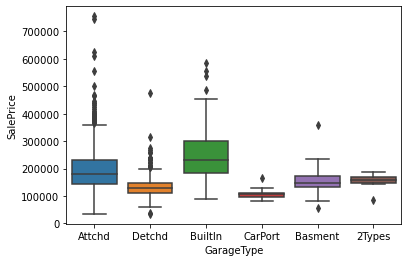

In [52]:
sns.boxplot(y=final['SalePrice'],x=final['GarageType'])
plt.show()

In [53]:
cate = final.columns[final.dtypes == object]

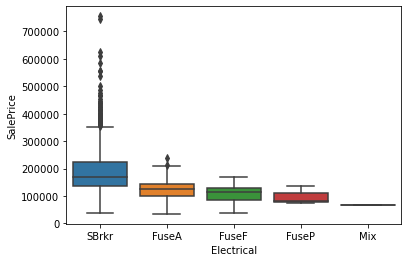

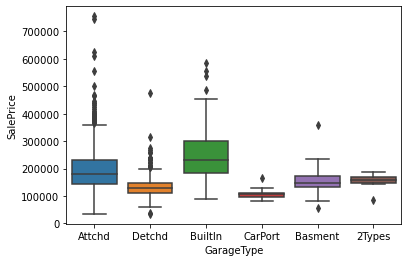

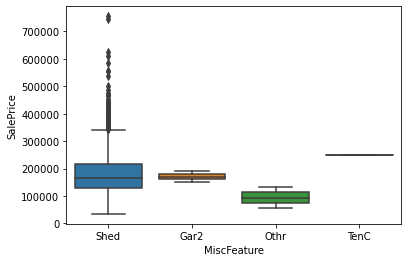

In [54]:
for i in cate:
    figure()
    sns.boxplot(y=final['SalePrice'],x=final[i])

# Capping outliers 

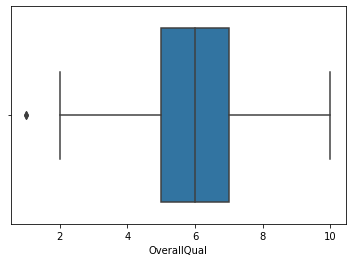

In [55]:
sns.boxplot(final['OverallQual'])
plt.show()

In [56]:
data_a = final['OverallQual']
Q3 = data_a.quantile(0.75)
Q1 = data_a.quantile(0.25)
IQR = Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_Bound = Q3+(1.5*IQR)
out = data_a[(data_a<lower_bound) | (data_a>upper_Bound)]
out.head(2)

356    1
510    1
Name: OverallQual, dtype: int64

In [57]:
final['OverallQual']=np.where(final['OverallQual']<lower_bound,lower_bound,final['OverallQual'])
final['OverallQual']=np.where(final['OverallQual']>upper_Bound,upper_Bound,final['OverallQual'])

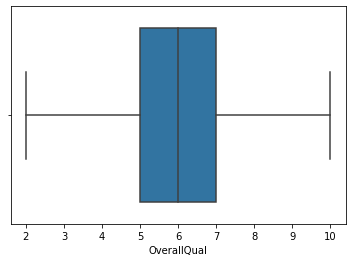

In [58]:
sns.boxplot(final['OverallQual'])
plt.show()

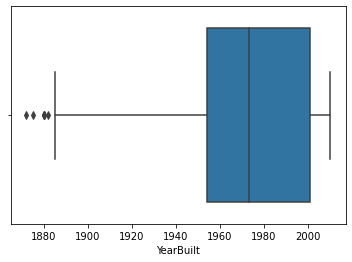

In [59]:
sns.boxplot(final['YearBuilt'])
plt.show()

In [60]:
data_a = final['YearBuilt']
Q3 = data_a.quantile(0.75)
Q1 = data_a.quantile(0.25)
IQR = Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_Bound = Q3+(1.5*IQR)
out = data_a[(data_a<lower_bound) | (data_a>upper_Bound)]
out.head(2)

285    1880
605    1880
Name: YearBuilt, dtype: int64

In [61]:
final['YearBuilt']=np.where(final['YearBuilt']<lower_bound,lower_bound,final['YearBuilt'])
final['YearBuilt']=np.where(final['YearBuilt']>upper_Bound,upper_Bound,final['YearBuilt'])

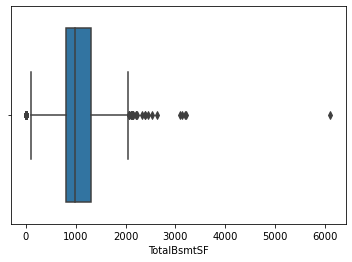

In [62]:
sns.boxplot(final['TotalBsmtSF'])
plt.show()

In [63]:
data_a = final['TotalBsmtSF']
Q3 = data_a.quantile(0.75)
Q1 = data_a.quantile(0.25)
IQR = Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_Bound = Q3+(1.5*IQR)
out = data_a[(data_a<lower_bound) | (data_a>upper_Bound)]
out.head(2)

16    0
37    0
Name: TotalBsmtSF, dtype: int64

In [64]:
final['TotalBsmtSF']=np.where(final['TotalBsmtSF']<lower_bound,lower_bound,final['TotalBsmtSF'])
final['TotalBsmtSF']=np.where(final['TotalBsmtSF']>upper_Bound,upper_Bound,final['TotalBsmtSF'])

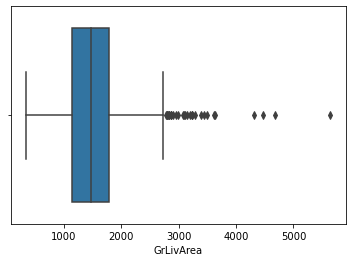

In [65]:
sns.boxplot(final['GrLivArea'])
plt.show()

In [66]:
data_a = final['GrLivArea']
Q3 = data_a.quantile(0.75)
Q1 = data_a.quantile(0.25)
IQR = Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_Bound = Q3+(1.5*IQR)
out = data_a[(data_a<lower_bound) | (data_a>upper_Bound)]
out.head(2)

55     2945
107    3222
Name: GrLivArea, dtype: int64

In [67]:
final['GrLivArea']=np.where(final['GrLivArea']<lower_bound,lower_bound,final['GrLivArea'])
final['GrLivArea']=np.where(final['GrLivArea']>upper_Bound,upper_Bound,final['GrLivArea'])

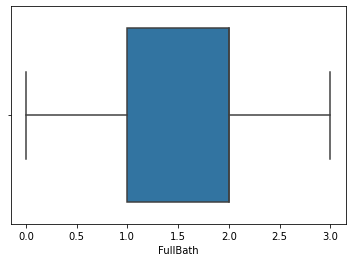

In [68]:
sns.boxplot(final['FullBath'])
plt.show()

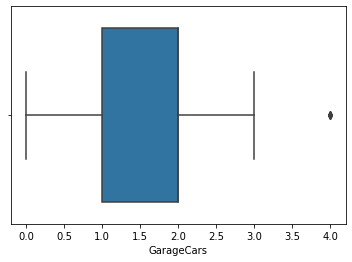

In [69]:
sns.boxplot(final['GarageCars'])
plt.show()

In [70]:
data_a = final['GarageCars']
Q3 = data_a.quantile(0.75)
Q1 = data_a.quantile(0.25)
IQR = Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_Bound = Q3+(1.5*IQR)
out = data_a[(data_a<lower_bound) | (data_a>upper_Bound)]
out.head(2)

399    4
720    4
Name: GarageCars, dtype: int64

In [71]:
final['GarageCars']=np.where(final['GarageCars']<lower_bound,lower_bound,final['GarageCars'])
final['GarageCars']=np.where(final['GarageCars']>upper_Bound,upper_Bound,final['GarageCars'])

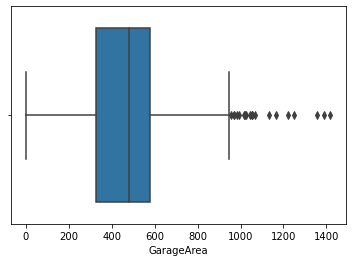

In [72]:
sns.boxplot(final['GarageArea'])
plt.show()

In [73]:
data_a = final['GarageArea']
Q3 = data_a.quantile(0.75)
Q1 = data_a.quantile(0.25)
IQR = Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_Bound = Q3+(1.5*IQR)
out = data_a[(data_a<lower_bound) | (data_a>upper_Bound)]
out.head(2)

163    1166
205     968
Name: GarageArea, dtype: int64

In [74]:
final['GarageArea']=np.where(final['GarageArea']<lower_bound,lower_bound,final['GarageArea'])
final['GarageArea']=np.where(final['GarageArea']>upper_Bound,upper_Bound,final['GarageArea'])

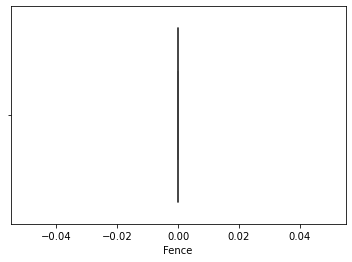

In [75]:
sns.boxplot(final['Fence'])
plt.show()

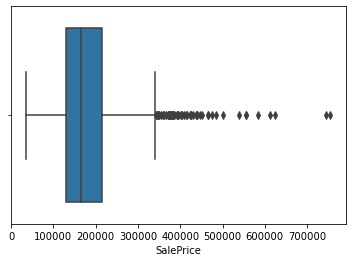

In [76]:
sns.boxplot(final['SalePrice'])
plt.show()

In [77]:
data_a = final['SalePrice']
Q3 = data_a.quantile(0.75)
Q1 = data_a.quantile(0.25)
IQR = Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_Bound = Q3+(1.5*IQR)
out = data_a[(data_a<lower_bound) | (data_a>upper_Bound)]
out.head(2)

10    345000
50    385000
Name: SalePrice, dtype: int64

In [78]:
final['SalePrice']=np.where(final['SalePrice']<lower_bound,lower_bound,final['SalePrice'])
final['SalePrice']=np.where(final['SalePrice']>upper_Bound,upper_Bound,final['SalePrice'])

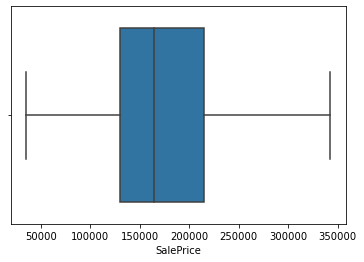

In [79]:
sns.boxplot(final['SalePrice'])
plt.show()

# Feature Selection

In [80]:
final.drop(['Id'],axis=1,inplace=True)

In [81]:
print('Total Rows of Data:-',final.shape[0])
print('Total Columns of Data:-',final.shape[1])

Total Rows of Data:- 1418
Total Columns of Data:- 12


# feature Engineering

In [82]:
final2 = pd.get_dummies(final,drop_first=True)

In [83]:
print('Total Rows of Data set:-',final2.shape[0])
print('Total Columns of Data set:-',final2.shape[1])

Total Rows of Data set:- 1418
Total Columns of Data set:- 21


# Sampling

# Add intecept column

In [84]:
from statsmodels.api import add_constant
final2 = add_constant(final2)

In [85]:
print('Total Rows of Data set:-',final2.shape[0])
print('Total Columns of Dataset:-',final2.shape[1])

Total Rows of Data set:- 1418
Total Columns of Dataset:- 22


# Data Divede into Train and Test

In [86]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(final2,train_size=0.90,random_state=123)

In [87]:
test.shape

(142, 22)

In [88]:
train.shape

(1276, 22)

In [89]:
# Divide Data into X - indenpendet Y- Dependent

In [90]:
trainX = train.drop(['SalePrice'],axis=1)
trainY = train['SalePrice']
testX = test.drop(['SalePrice'],axis=1)
testY = test['SalePrice']

In [91]:
trainX.shape

(1276, 21)

In [92]:
trainY.shape

(1276,)

In [93]:
testX.shape

(142, 21)

In [94]:
testY.shape

(142,)

# VIF ckeck -- Variance Influance Factor

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
VIF = pd.DataFrame()
VIF['Features'] = trainX.columns
VIF['VIF'] = [variance_inflation_factor(trainX.values, i) for i in range(trainX.shape[1])]
VIF

,Features,VIF
0,const,13007.729522
1,OverallQual,2.751065
2,YearBuilt,2.802546
3,TotalBsmtSF,1.780487
4,GrLivArea,2.721770
5,FullBath,2.241976
6,GarageCars,5.905524
7,GarageArea,5.499513
8,Fence,NaN
9,Electrical_FuseF,1.296632


In [97]:
VIF_max = 5
VIF_cotf = 5
train_d = trainX.copy()
High_VIF = []
while (VIF_max >= VIF_cotf):
    VIF = pd.DataFrame()
    VIF['VIF'] = [variance_inflation_factor(train_d.values, i) for i in range(train_d.shape[1])]
    VIF['Columns'] = train_d.columns
    VIF.dropna(inplace=True)
    T_vif_col = VIF.sort_values(['VIF'],ascending = False).iloc[0,1]
    VIF_max = VIF.sort_values(['VIF'],ascending = False).iloc[0,0]
    if (VIF_max >= VIF_cotf):
        train_d = train_d.drop([T_vif_col],axis=1)
        High_VIF.append(T_vif_col)

In [98]:
High_VIF.remove('const')

In [99]:
High_VIF

['YearBuilt',
 'MiscFeature_Shed',
 'OverallQual',
 'GarageCars',
 'GrLivArea',
 'GarageType_Attchd',
 'FullBath',
 'TotalBsmtSF',
 'Electrical_SBrkr']

In [100]:
VIF

,VIF,Columns
0,1.334372,GarageArea
2,1.033719,Electrical_FuseF
3,1.004492,Electrical_FuseP
4,1.003381,Electrical_Mix
5,1.013969,GarageType_Basment
6,1.104408,GarageType_BuiltIn
7,1.007169,GarageType_CarPort
8,1.251429,GarageType_Detchd
9,1.000162,MiscFeature_Othr
10,1.001244,MiscFeature_TenC


In [101]:
trainX = trainX.drop(High_VIF,axis=1)
testX = testX.drop(High_VIF,axis=1)

In [102]:
trainX.shape

(1276, 12)

In [103]:
testX.shape

(142, 12)

# Model Building

In [104]:
from statsmodels.api import OLS
model = OLS(trainY,trainX)
modelbuild = model.fit()

In [105]:
modelbuild.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     154.2
Date:                Sat, 15 Oct 2022   Prob (F-statistic):          7.68e-211
Time:                        21:38:01   Log-Likelihood:                -15497.
No. Observations:                1276   AIC:                         3.102e+04
Df Residuals:                    1265   BIC:                         3.107e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9.703e+04   3476.602     27.909      0.000    9.02e+04    1.04e+05
GarageArea           195.1467      6.351     30.727      0.000     182.687     207.606
Fence              -1.504e-11   1.49e-11     -1.012      0.312   -4.42e-11    1.41e-11
Electrical_FuseF   -9163.8024   9799.419     -0.935      0.350   -2.84e+04    1.01e+04
Electrical_FuseP    -3.08e+04   2.65e+04     -1.163      0.245   -8.28e+04    2.12e+04
Electrical_Mix     -5.054e+04   4.58e+04     -1.103      0.270    -1.4e+05    3.93e+04
GarageType_Basment  -2.39e+04   1.09e+04     -2.193      0.028   -4.53e+04   -2522.406
GarageType_BuiltIn    2.8e+04   5376.859      5.207      0.000    1.74e+04    3.85e+04
GarageType_CarPort -7.514e+04   1.53e+04     -4.903      0.000   -1.05e+05   -4.51e+04
GarageType_Detchd  -4.545e+04   3089.912    -14.710      0.000   -5.15e+04   -3.94e+04
MiscFeature_Othr   -3.113e+04   3.24e+04     -0.959      0.338   -9.48e+04    3.25e+04
MiscFeature_TenC    4.291e+04   4.58e+04      0.938      0.349   -4.69e+04    1.33e+05
==============================================================================
Omnibus:                       76.186   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.678
Skew:                           0.511   Prob(JB):                     4.15e-24
Kurtosis:                       3.990   Cond. No.                     1.05e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.08e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [106]:
dir(modelbuild)
modelbuild.pvalues

const                 5.793448e-134
GarageArea            2.435871e-155
Fence                  3.118052e-01
Electrical_FuseF       3.498960e-01
Electrical_FuseP       2.450107e-01
Electrical_Mix         2.701883e-01
GarageType_Basment     2.846398e-02
GarageType_BuiltIn     2.240349e-07
GarageType_CarPort     1.066457e-06
GarageType_Detchd      2.460732e-45
MiscFeature_Othr       3.375638e-01
MiscFeature_TenC       3.486053e-01
dtype: float64

# Model Optimization

In [107]:
Max_p_value = 0.05
Cort_max_p = 0.05
train_f = trainX.copy()
High_p_value = []
while (Max_p_value >= Cort_max_p):
    T_model = pd.DataFrame()
    model = OLS(trainY,train_f).fit()
    T_model['P_value'] = model.pvalues
    T_model['Columns'] = train_f.columns
    T_model.dropna(inplace=True)
    T_col_p = T_model.sort_values(['P_value'],ascending = False).iloc[0,1]
    Max_p_value = T_model.sort_values(['P_value'],ascending = False).iloc[0,0]
    if (Max_p_value >= Cort_max_p):
        train_f = train_f.drop(T_col_p,axis=1)
        High_p_value.append(T_col_p)

In [108]:
High_p_value

['Electrical_FuseF',
 'MiscFeature_TenC',
 'MiscFeature_Othr',
 'Electrical_Mix',
 'Electrical_FuseP']

In [109]:
T_model

,P_value,Columns
const,3.313398e-135,const
GarageArea,2.731289e-160,GarageArea
Fence,3.387251e-100,Fence
GarageType_Basment,2.978193e-02,GarageType_Basment
GarageType_BuiltIn,2.500676e-07,GarageType_BuiltIn
GarageType_CarPort,1.133187e-06,GarageType_CarPort
GarageType_Detchd,4.731286e-47,GarageType_Detchd


In [110]:
trainX = trainX.drop(High_p_value,axis=1)
testX = testX.drop(High_p_value,axis=1)

In [111]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     307.3
Date:                Sat, 15 Oct 2022   Prob (F-statistic):          1.09e-215
Time:                        21:38:01   Log-Likelihood:                -15500.
No. Observations:                1276   AIC:                         3.101e+04
Df Residuals:                    1270   BIC:                         3.104e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9.614e+04   3426.163     28.060      0.000    8.94e+04    1.03e+05
GarageArea           196.7054      6.274     31.354      0.000     184.397     209.014
Fence              -3.307e-11   1.42e-12    -23.290      0.000   -3.59e-11   -3.03e-11
GarageType_Basment  -2.37e+04   1.09e+04     -2.175      0.030   -4.51e+04   -2327.148
GarageType_BuiltIn  2.788e+04   5375.365      5.186      0.000    1.73e+04    3.84e+04
GarageType_CarPort -7.496e+04   1.53e+04     -4.891      0.000   -1.05e+05   -4.49e+04
GarageType_Detchd  -4.601e+04   3063.745    -15.018      0.000    -5.2e+04      -4e+04
==============================================================================
Omnibus:                       74.989   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.661
Skew:                           0.506   Prob(JB):                     1.14e-23
Kurtosis:                       3.981   Cond. No.                     6.25e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.72e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Build model on trainX, trainY (after removing insignificant columns)

In [112]:
Model = OLS(trainY, trainX).fit()
Model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     307.3
Date:                Sat, 15 Oct 2022   Prob (F-statistic):          1.09e-215
Time:                        21:38:01   Log-Likelihood:                -15500.
No. Observations:                1276   AIC:                         3.101e+04
Df Residuals:                    1270   BIC:                         3.104e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9.614e+04   3426.163     28.060      0.000    8.94e+04    1.03e+05
GarageArea           196.7054      6.274     31.354      0.000     184.397     209.014
Fence              -3.307e-11   1.42e-12    -23.290      0.000   -3.59e-11   -3.03e-11
GarageType_Basment  -2.37e+04   1.09e+04     -2.175      0.030   -4.51e+04   -2327.148
GarageType_BuiltIn  2.788e+04   5375.365      5.186      0.000    1.73e+04    3.84e+04
GarageType_CarPort -7.496e+04   1.53e+04     -4.891      0.000   -1.05e+05   -4.49e+04
GarageType_Detchd  -4.601e+04   3063.745    -15.018      0.000    -5.2e+04      -4e+04
==============================================================================
Omnibus:                       74.989   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.661
Skew:                           0.506   Prob(JB):                     1.14e-23
Kurtosis:                       3.981   Cond. No.                     6.25e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.72e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Model prediction

In [113]:
Test_Pred = Model.predict(testX)

In [114]:
Test_Pred[0:6]

646    203539.543272
706    148068.614411
594    243470.743835
171    153986.196677
169    215358.288183
637    165788.521967
dtype: float64

In [115]:
testY[:6]

646    165000.0
706    131400.0
594    305000.0
171    153337.0
169    342500.0
637    137500.0
Name: SalePrice, dtype: float64

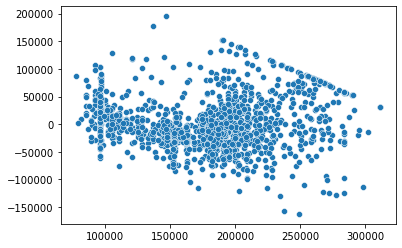

In [116]:
import seaborn as sns
# Equal Variance hona chahiye
# Homoskedasticity check
sns.scatterplot(Model.fittedvalues, Model.resid) # Should not show prominent non-constant variance (heteroskadastic) of errors against fitted values
plt.show()

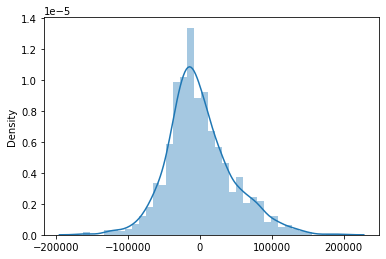

In [117]:
sns.distplot(Model.resid) # Should be somewhat close to normal distribution
plt.show()

In [118]:
np.sqrt(np.mean((testY- Test_Pred)**2))  # RMSE

44011.88058700981

In [119]:
(np.mean(np.abs(((testY - Test_Pred)/testY))))*100  # MAPE

19.709489051887164